In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from IPython import display
import time

In [2]:
# f(x) = (x1**2) + 4*(x2)**2 - (4*x1) - (8*x2)

def f(x1, x2):
    return (x1**2) + 4*(x2)**2 - (4*x1) - (8*x2)

def g(x1,x2):
    return np.array([2*x1-4,8*x2-8])

def grad_norm(x1,x2):
    return (2*x1-4)**2+(8*x2-8)**2

def exact_alpha(x1,x2):
    g1 = 2*x1-4
    g2 = 8*x2-8
    
    alpha = (g1*(x1-2)+g2*(4*x2-4))/(g1**2+4*(g2**2))
    return alpha

In [3]:
x1 = np.linspace(-1, 5, 100)
x2 = np.linspace(-1, 3, 100)

X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

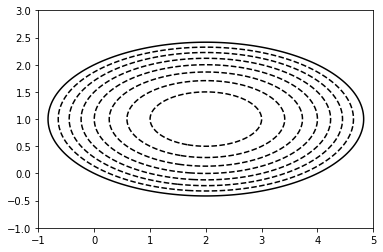

In [4]:
plt.contour(X1, X2, Z, colors='black',levels = [-8,-7,-6,-5,-4,-3,-2,-1,0]);

In [5]:

def simulate(x1,x2,X1,X2,Z):
    k = 0
    while grad_norm(x1,x2) > 1e-5:

        k = k+1
        alpha = exact_alpha(x1,x2)
        g1 = 2*x1-4
        g2 = 8*x2-8
        x1_new = x1-alpha*g1
        x2_new = x2-alpha*g2

        plt.contour(X1, X2, Z, colors='black',levels = [-8,-7.95,-7.9,-7.7,-7.5,-7.3,-7,-6,-5,-4,-3,-2,-1,0,1,2]);
        plt.plot([x1,x1_new],[x2,x2_new],linewidth = 2)

        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(2.0)

        x1 = x1_new
        x2 = x2_new

    print('Minimum point == (%d, %d)' % (x1,x2))
    print("Minimum value == ",f(x1,x2))
    print("Number of iterations == ",k)

Minimum point == (1, 0)
Minimum value ==  -7.999999053211235
Number of iterations ==  12


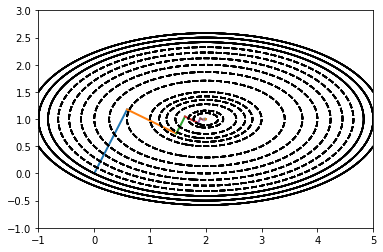

In [6]:
simulate(0,0,X1,X2,Z)

Minimum point == (2, 1)
Minimum value ==  -8.0
Number of iterations ==  1


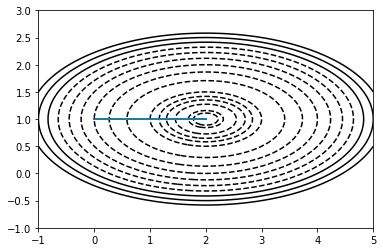

In [7]:
simulate(0,1,X1,X2,Z)